In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__) # check tensorflow version

2.12.0


# 1. Load data

In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Show data shape
print("Train images shape ", train_images.shape)
print("Test images shape ", test_images.shape)

Train images shape  (60000, 28, 28)
Test images shape  (10000, 28, 28)


In [5]:
# Lets check the labels
print(" We have the following unique labels ", set(train_labels) )

 We have the following unique labels  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
# Lets finds the names from the website https://keras.io/api/datasets/fashion_mnist/
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# 2. Let's apply a min-max scaling

In [7]:
# each picture only has one chanel, ranging from 0 to 255
train_images = train_images / 255
test_images = test_images / 255

# 3. Let's plot one image

In [8]:
labels[train_labels[0]]

'Ankle boot'

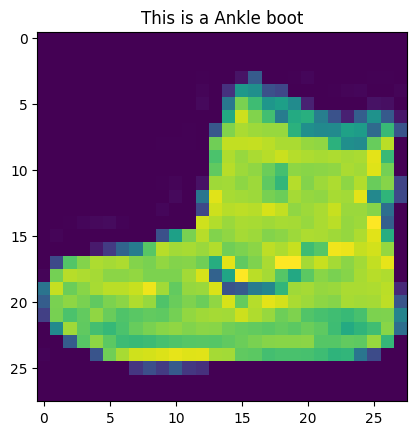

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.title(f"This is a {labels[train_labels[0]]}")
plt.show()

# 4. Let's build the model

In [10]:
# Let's start by using a 2D conv  kernel (3x3) with 16 channels using a relu activation
# Following a MaxPooling (3x3)
# And a fully connected layers of 10 neurons i.e. 1 for each predicted label using a softmax for vales between 0 and 1

# CNN example here https://www.tensorflow.org/tutorials/images/cnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

# 5. Let's print out the model summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


# 6. Let's compile the model

In [12]:
# Since we have a multiclass problem we need to use a suitable loss function. In this case we choose **sparse_categorical_crossentropy**.
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Case we had hot hot encoded our outputs, like we did in the MNIST dataset we would use **categorical_crossentropy**
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 7. Fit the model

In [13]:
# in order to fit the model, we need to convert our images in a single vector instead of a 28x28.
# The goal is then to obtain a 784
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1],train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2] , 1)

In [14]:
train_images[100].shape

(28, 28, 1)

In [15]:
result = model.fit(train_images[:10000], train_labels[:10000], epochs=10, batch_size=100, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 8s 67ms/step - loss: 1.2595 - accuracy: 0.6126 - val_loss: 0.7757 - val_accuracy: 0.7180
Epoch 2/10
90/90 [==============================] - 4s 40ms/step - loss: 0.6710 - accuracy: 0.7660 - val_loss: 0.6332 - val_accuracy: 0.7690
Epoch 3/10
90/90 [==============================] - 2s 27ms/step - loss: 0.5781 - accuracy: 0.7906 - val_loss: 0.5706 - val_accuracy: 0.7890
Epoch 4/10
90/90 [==============================] - 2s 27ms/step - loss: 0.5247 - accuracy: 0.8104 - val_loss: 0.5357 - val_accuracy: 0.8080
Epoch 5/10
90/90 [==============================] - 2s 27ms/step - loss: 0.4906 - accuracy: 0.8259 - val_loss: 0.5011 - val_accuracy: 0.8310
Epoch 6/10
90/90 [==============================] - 4s 45ms/step - loss: 0.4676 - accuracy: 0.8367 - val_loss: 0.4965 - val_accuracy: 0.8200
Epoch 7/10
90/90 [==============================] - 2s 27ms/step - loss: 0.4462 - accuracy: 0.8439 - val_loss: 0.4830 - val_accuracy: 0.8370
Epoch 8/10
90

# 8. Let's add more layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# fit
result = model.fit(train_images[:10000], train_labels[:10000], epochs=20, batch_size=100, validation_split=0.1)

Epoch 1/20
90/90 [==============================] - 9s 87ms/step - loss: 1.5979 - accuracy: 0.4819 - val_loss: 0.9140 - val_accuracy: 0.6710
Epoch 2/20
90/90 [==============================] - 6s 70ms/step - loss: 0.7714 - accuracy: 0.7172 - val_loss: 0.7133 - val_accuracy: 0.7370
Epoch 3/20
90/90 [==============================] - 8s 84ms/step - loss: 0.6645 - accuracy: 0.7534 - val_loss: 0.6413 - val_accuracy: 0.7690
Epoch 4/20
90/90 [==============================] - 7s 75ms/step - loss: 0.5978 - accuracy: 0.7801 - val_loss: 0.6022 - val_accuracy: 0.7690
Epoch 5/20
90/90 [==============================] - 7s 75ms/step - loss: 0.5585 - accuracy: 0.7968 - val_loss: 0.5782 - val_accuracy: 0.7900
Epoch 6/20
90/90 [==============================] - 7s 80ms/step - loss: 0.5232 - accuracy: 0.8084 - val_loss: 0.5401 - val_accuracy: 0.8030
Epoch 7/20
90/90 [==============================] - 6s 72ms/step - loss: 0.5045 - accuracy: 0.8162 - val_loss: 0.5184 - val_accuracy: 0.8110
Epoch 8/20
90

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 16)          9232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 144)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

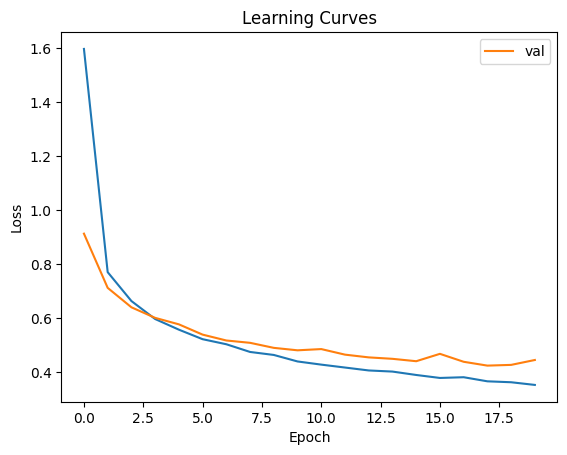

In [18]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()

In [19]:
# evaluate model
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 7ms/step - loss: 0.4463 - accuracy: 0.8433


# 9. Vizualize layers

In [20]:
# running model.layers it is possible to access all the internal layers of the model
model.layers

In [21]:
# to capture the weights we do
conv1_filters, conv1_biases = model.layers[0].get_weights()

In [22]:
conv1_filters.shape

(3, 3, 1, 64)

In [23]:
# lets normalize filters
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = conv1_filters.min(), conv1_filters.max()
conv1_filters = (conv1_filters - f_min) / (f_max - f_min)

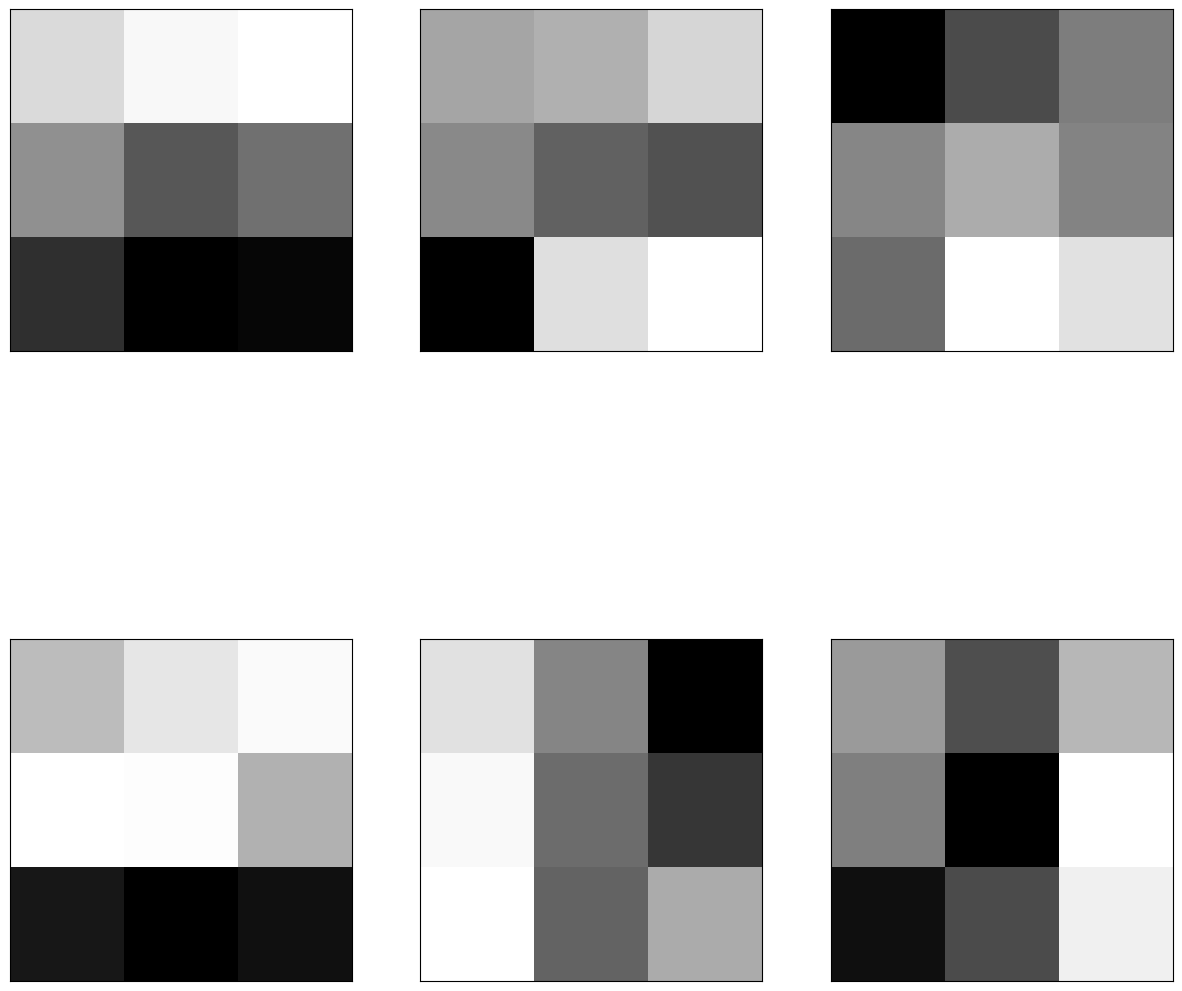

In [24]:
import matplotlib.pyplot as plt
# plot first 6 filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(2, 3, figsize=(15,15))
axs = ax.flat
for i in range(n_filters):
    # get the filter
    f = conv1_filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis

    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # plot filter channel in grayscale
    axs[i].imshow(f, cmap='gray')
    ix += 1
# show the figure
plt.show()

In [25]:
# 2nd layer
# to capture the weights we do
conv2_filters, conv2_biases = model.layers[2].get_weights()

In [26]:
conv2_filters.shape

(3, 3, 64, 16)

# Let's create a bigger filter


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(64, (28,28), activation='relu', input_shape=(28,28,1)),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# fit
result = model.fit(train_images[:10000], train_labels[:10000], epochs=40, batch_size=100, validation_split=0.1)

Epoch 1/40
90/90 [==============================] - 1s 9ms/step - loss: 0.9639 - accuracy: 0.6830 - val_loss: 0.6941 - val_accuracy: 0.7580
Epoch 2/40
90/90 [==============================] - 1s 7ms/step - loss: 0.5954 - accuracy: 0.7959 - val_loss: 0.6341 - val_accuracy: 0.7960
Epoch 3/40
90/90 [==============================] - 1s 8ms/step - loss: 0.5189 - accuracy: 0.8260 - val_loss: 0.5313 - val_accuracy: 0.8130
Epoch 4/40
90/90 [==============================] - 1s 8ms/step - loss: 0.4718 - accuracy: 0.8400 - val_loss: 0.5171 - val_accuracy: 0.8230
Epoch 5/40
90/90 [==============================] - 1s 6ms/step - loss: 0.4441 - accuracy: 0.8443 - val_loss: 0.4852 - val_accuracy: 0.8290
Epoch 6/40
90/90 [==============================] - 0s 5ms/step - loss: 0.4261 - accuracy: 0.8547 - val_loss: 0.4929 - val_accuracy: 0.8230
Epoch 7/40
90/90 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8533 - val_loss: 0.4824 - val_accuracy: 0.8350
Epoch 8/40
90/90 [==

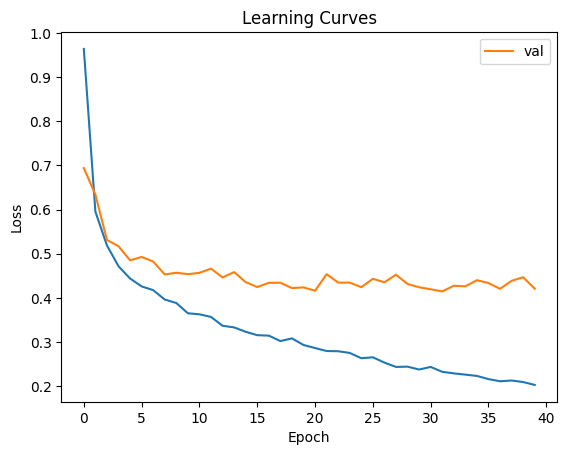

In [28]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()

In [29]:
# to capture the weights we do
conv1_filters, conv1_biases = model.layers[0].get_weights()

In [30]:
conv1_filters.shape

(28, 28, 1, 64)

In [31]:
# lets normalize filters
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = conv1_filters.min(), conv1_filters.max()
conv1_filters = (conv1_filters - f_min) / (f_max - f_min)

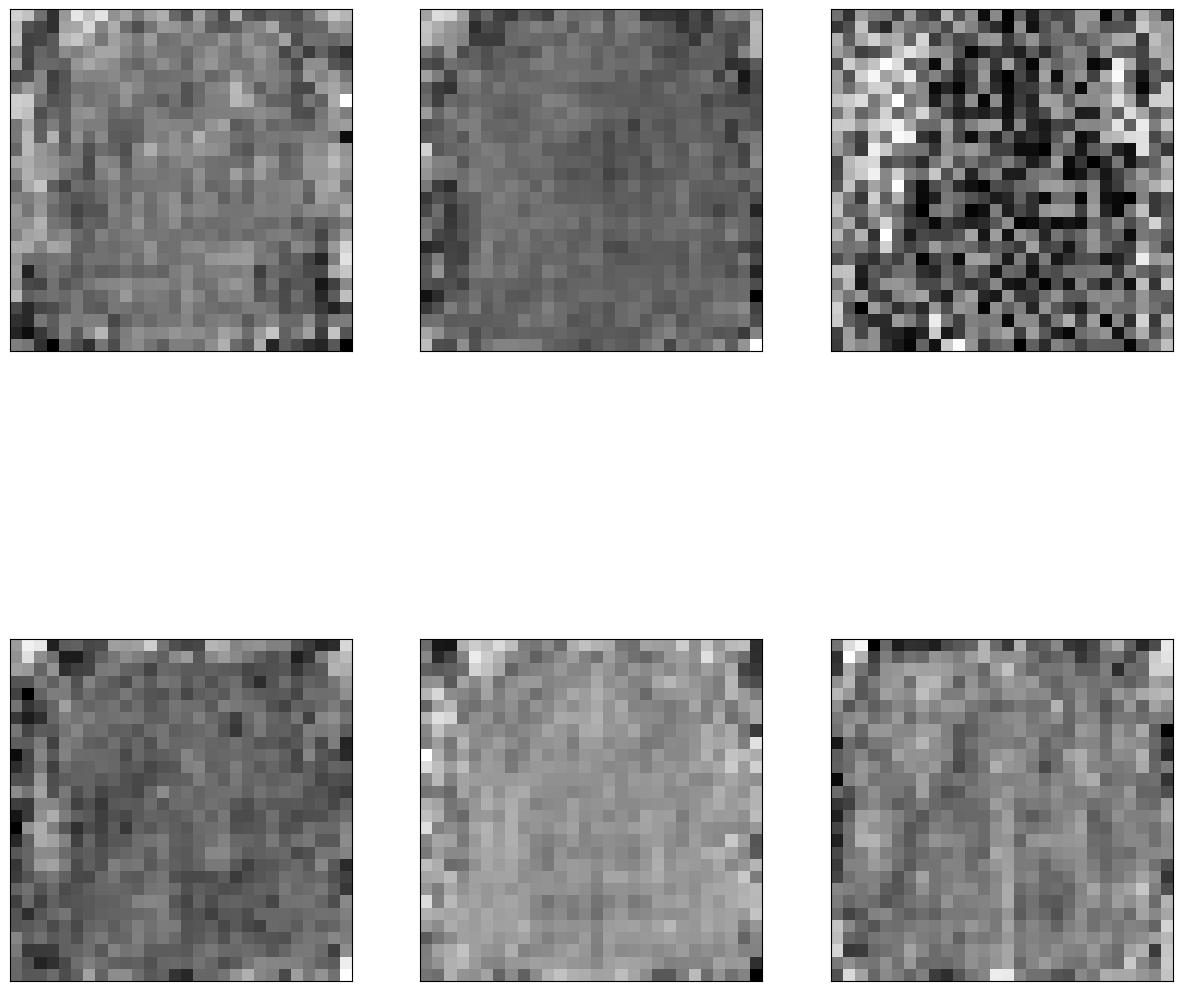

In [32]:
import matplotlib.pyplot as plt
# plot first 6 filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(2, 3, figsize=(15,15))
axs = ax.flat
for i in range(n_filters):
    # get the filter
    f = conv1_filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis

    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # plot filter channel in grayscale
    axs[i].imshow(f, cmap='gray')
    ix += 1
# show the figure
plt.show()